# Simple Linear Regression

## Import necessary modules

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import pandas as pd
import statsmodels.api as sm

## Outlier removal function

Detect and deletes outliers in the scores using the Inter Quartile Range

In [2]:
def delete_outliers (var):
    
    Q1 = np.percentile(scores_GDP[var], 25, interpolation = 'midpoint')
    Q3 = np.percentile(scores_GDP[var], 75, interpolation = 'midpoint')
    IQR = Q3-Q1 
    
    #Above Upper Bound
    upper = scores_GDP.index[scores_GDP[var] >= (Q3 + 1.5*IQR)]
    
    #Below Lower Bound
    lower = scores_GDP.index[scores_GDP[var] <= (Q1 - 1.5*IQR)]
    
    #Drops outliers
    scores_GDP.drop(upper, inplace = True)
    scores_GDP.drop(lower, inplace = True)

## Data scraping and cleaning

Reads data and assigns it to a pandas' dataframe

In [3]:
df = pd.read_excel('/home/gabriel/Documents/index2021_data.xls','Sheet1', index_col=None, na_values=['N/A'])

In [4]:
#Takes the scores and GDP per capita variables and creates a sub dataframe

scores_GDP = df[['Country Name','2021 Score','GDP per Capita (PPP)']].copy(deep=True)

if scores_GDP.isnull().any().any() == True:  #Checks is there are any null values in the dataframe
    scores_GDP_with_nan = scores_GDP.index[scores_GDP.isnull().any(axis=1)] #Creates dataframe with countries with null values
    scores_GDP.drop(scores_GDP_with_nan, axis = 0, inplace = True) #Deletes countries without rows

In [5]:
#Delete outliers in GDP and score

delete_outliers('2021 Score')
delete_outliers('GDP per Capita (PPP)')

## Define the regression model

Define the variables for the model

In [7]:
#Adds another column with the score values squared to make a quadratic regression
scores_GDP['2021 Score Square'] = scores_GDP['2021 Score']**2 

x = scores_GDP[['2021 Score','2021 Score Square']] #Independent Variable, explains the y

x = sm.add_constant(x)

y = scores_GDP['GDP per Capita (PPP)'] #Dependent Variable, we want to explain it

model = sm.OLS(y, x).fit()

/home/gabriel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Show results

Plot the actual and predicted values 

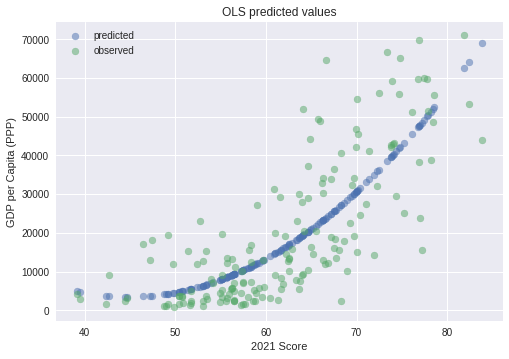

In [8]:
plt.style.use('seaborn')

# Plot predicted values

predictions = model.predict(x) # make the predictions by the model
fix, ax = plt.subplots()
ax.scatter(scores_GDP['2021 Score'], predictions, alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(scores_GDP['2021 Score'], scores_GDP['GDP per Capita (PPP)'], alpha=0.5,
        label='observed')

#Configure and show graph

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('2021 Score')
ax.set_ylabel('GDP per Capita (PPP)')
plt.show()

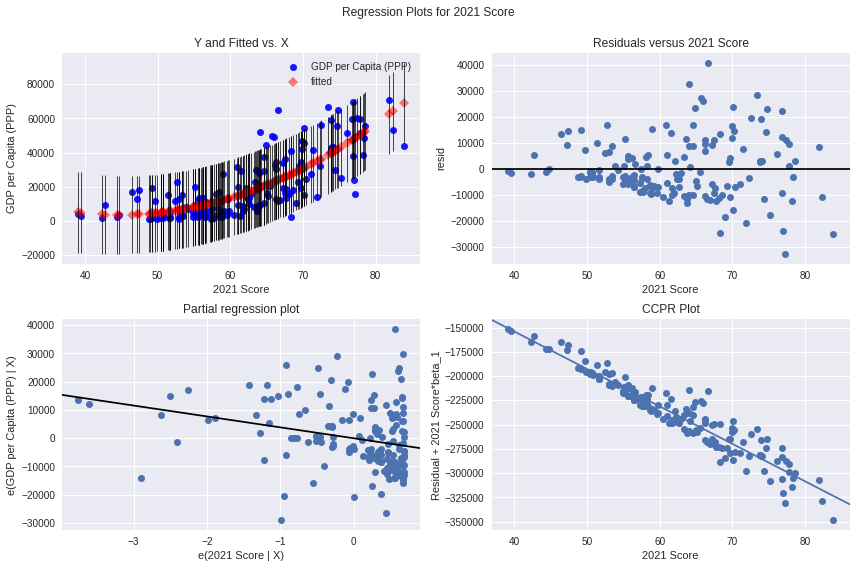

In [9]:
#Define figure size
fig = plt.figure(figsize=(12,8))

#Produce regression plots
fig = sm.graphics.plot_regress_exog(model,'2021 Score' , fig=fig)

Print out the statistics

In [10]:
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     GDP per Capita (PPP)   R-squared:                       0.626
Model:                              OLS   Adj. R-squared:                  0.621
Method:                   Least Squares   F-statistic:                     140.4
Date:                  Sat, 12 Feb 2022   Prob (F-statistic):           1.42e-36
Time:                          13:38:18   Log-Likelihood:                -1837.4
No. Observations:                   171   AIC:                             3681.
Df Residuals:                       168   BIC:                             3690.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             